# PRÁCTICA 1
# CUANTIFICACIÓN UNIFORME Y DITHERING

## La clase uniformeSQ
La clase UniformSQ implementada en scalib permite construir cuantificadores uniformes a partir
de una tasa de bits por muestra deseada (que establece el número de niveles de cuantificación) y el
rango de entrada del cuantificador (rango de las señales que vamos a cuantificar). A continuación se
muestra un ejemplo de uso de UniformSQ para cuantificar una señal unidimensional

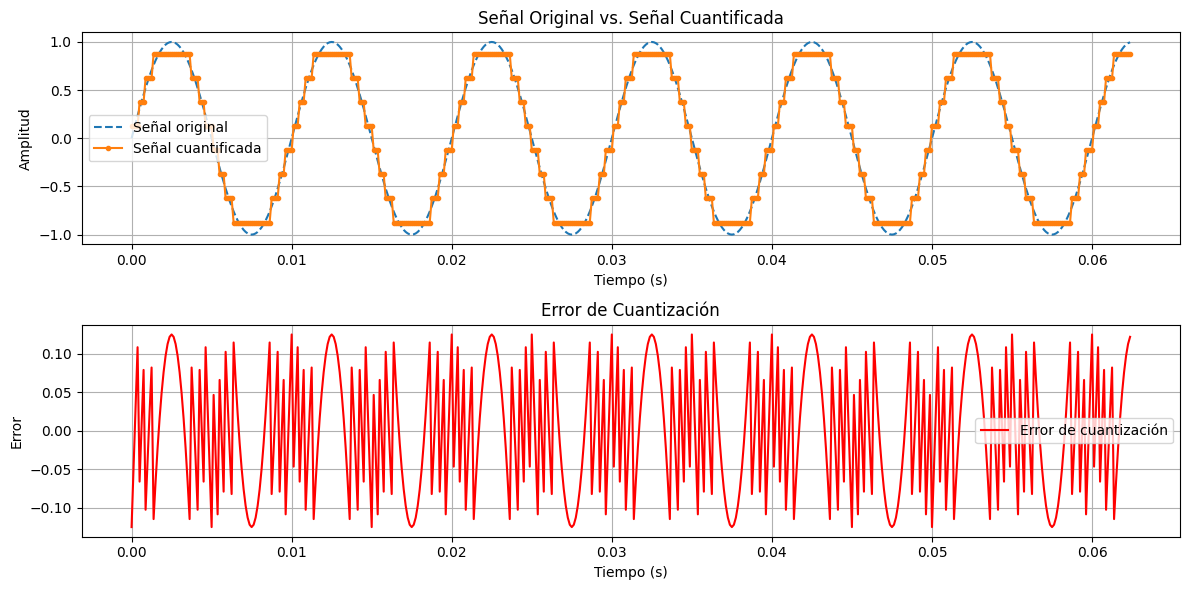

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scalib import UniformSQ

#? Parámetros de la señal
fs = 8000  # Frecuencia de muestreo de 8 kHz
t = np.arange(0, 2, 1/fs)  # Vector de tiempos de 2 segundos de duración
x = np.sin(2 * np.pi * 100 * t)  # Señal sinusoidal de 100 Hz

#? Configuración de la cuantización
xRange = (-1, 1)  # Rango de la señal x
b = 3  # Número de bits por muestra

#? Cuantificación uniforme
qtz = UniformSQ(b, xRange)  # Creación del cuantificador
xq = qtz.quantize(x)  # Cuantificación de la señal

#? Cálculo del error de cuantización
error = x - xq

#? Representacioes gráficas
plt.figure(figsize=(12, 6))

# Gráfica de la señal original y cuantificada
plt.subplot(2, 1, 1)
plt.plot(t[:500], x[:500], label="Señal original", linestyle='dashed')
plt.plot(t[:500], xq[:500], label="Señal cuantificada", marker='o', markersize=3)
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.title("Señal Original vs. Señal Cuantificada")
plt.legend()
plt.grid()

# Gráfica del error de cuantización
plt.subplot(2, 1, 2)
plt.plot(t[:500], error[:500], color="red", label="Error de cuantización")
plt.xlabel("Tiempo (s)")
plt.ylabel("Error")
plt.title("Error de Cuantización")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()



# Ejercicio 1

Construya dos cuantificadores uniformes, uno de media contrahuella y otro de media huella. En ambos casos, la tasa de bits por muestra resultante debe ser de 3 bits. Use ambos cuantificadores para cuantificar 3 señales:

- Una señal sinusoidal de 50 Hz y 1 s de duración muestreada a 8 kHz.
- La señal de voz almacenada en el archivo `altura.wav`.
- La imagen de Lena (almacenada en el archivo `lena.png`).

Calcule la SNR de cuantificación para todas las señales cuantificadas (6 en total), reproduzca las señales de voz y represente las imágenes. Comente las diferencias en cuanto a SNR y calidad percibida de las señales, comparando los dos cuantificadores.

En base a los resultados obtenidos, indique justificadamente las ventajas e inconvenientes de los cuantificadores de media contrahuella y los de media huella.


SNR Señal Sinusoidal - Midrise: 19.11 dB
SNR Señal Sinusoidal - Midtread: 17.90 dB
SNR Imagen - Midrise: 15.60 dB
SNR Imagen - Midtread: 12.90 dB
SNR Señal de Voz - Midrise: -1.43 dB
SNR Señal de Voz - Midtread: 5.03 dB
Reproduciendo señal cuantificada - Midrise...
Reproduciendo señal cuantificada - Midtread...


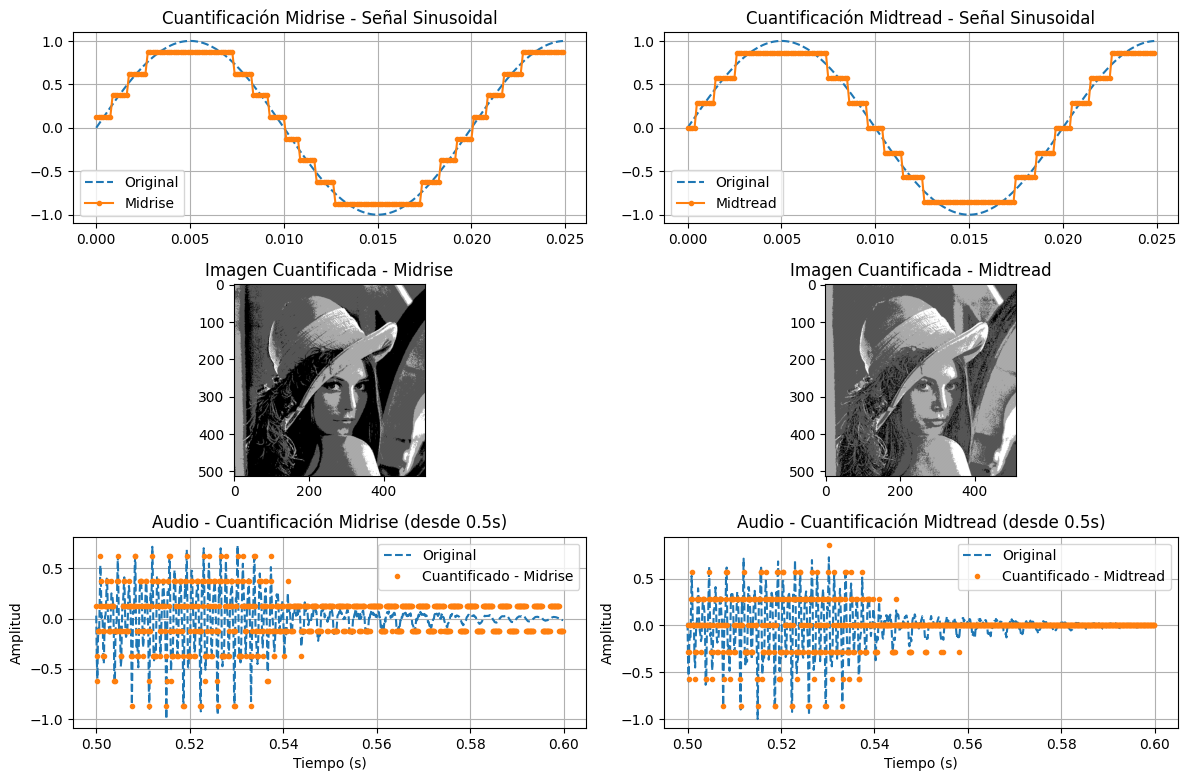

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import sounddevice as sd
from skimage import io, color
from scalib import UniformSQ, snr
from scipy.io import wavfile
import os


#? 1. Generar una señal sinusoidal de 50 Hz muestreada a 8 kHz
fs = 8000  # Frecuencia de muestreo
t = np.arange(0, 1, 1/fs)  # 1 segundo de duración
x_sin = np.sin(2 * np.pi * 50 * t)  # Señal sinusoidal

#? 2. Cargar la señal de voz altura.wav
fs_audio, x_audio = wavfile.read("Datos/altura.wav")  # Leer archivo de audio
x_audio = x_audio / np.max(np.abs(x_audio))   # Normalizar a rango (-1,1)

#? 3. Cargar la imagen lena.png en escala de grises
img = io.imread("Datos/lena.png")
img_gray = color.rgb2gray(img)  # Convertir a escala de grises
img_gray = img_gray / np.max(img_gray)  # Normalizar a (0,1)

#? Configuración de cuantificadores
b = 3               # 3 bits por muestra
xRange = (-1, 1)    # Rango de entrada

qtz_midrise = UniformSQ(b, xRange, qtype="midrise")   # Cuantificador de media contrahuella
qtz_midtread = UniformSQ(b, xRange, qtype="midtread") # Cuantificador de media huella

# Cuantificación de la señal sinusoidal
xq_sin_midrise = qtz_midrise.quantize(x_sin)
xq_sin_midtread = qtz_midtread.quantize(x_sin)
# Cuantificación de la señal de voz
xq_audio_midrise = qtz_midrise.quantize(x_audio)
xq_audio_midtread = qtz_midtread.quantize(x_audio)
# Cuantificación de la imagen
xq_img_midrise = qtz_midrise.quantize(img_gray)
xq_img_midtread = qtz_midtread.quantize(img_gray)

#? Cálculo de SNR
snr_sin_midrise = snr(x_sin, xq_sin_midrise)
snr_sin_midtread = snr(x_sin, xq_sin_midtread)

snr_audio_midrise = snr(x_audio, xq_audio_midrise)
snr_audio_midtread = snr(x_audio, xq_audio_midtread)

snr_img_midrise = snr(img_gray, xq_img_midrise)
snr_img_midtread = snr(img_gray, xq_img_midtread)

# Mostrar resultados de SNR
print(f"SNR Señal Sinusoidal - Midrise: {snr_sin_midrise:.2f} dB")
print(f"SNR Señal Sinusoidal - Midtread: {snr_sin_midtread:.2f} dB")

print(f"SNR Imagen - Midrise: {snr_img_midrise:.2f} dB")
print(f"SNR Imagen - Midtread: {snr_img_midtread:.2f} dB")

print(f"SNR Señal de Voz - Midrise: {snr_audio_midrise:.2f} dB")
print(f"SNR Señal de Voz - Midtread: {snr_audio_midtread:.2f} dB")

#? Representación gráfica de la cuantificación
plt.figure(figsize=(12, 10))

# Señal sinusoidal cuantificada
plt.subplot(4, 2, 1)
plt.plot(t[:200], x_sin[:200], label="Original", linestyle='dashed')
plt.plot(t[:200], xq_sin_midrise[:200], label="Midrise", marker='o', markersize=3)
plt.title("Cuantificación Midrise - Señal Sinusoidal")
plt.legend()
plt.grid()

plt.subplot(4, 2, 2)
plt.plot(t[:200], x_sin[:200], label="Original", linestyle='dashed')
plt.plot(t[:200], xq_sin_midtread[:200], label="Midtread", marker='o', markersize=3)
plt.title("Cuantificación Midtread - Señal Sinusoidal")
plt.legend()
plt.grid()

# Imagen cuantificada
plt.subplot(4, 2, 3)
plt.imshow(xq_img_midrise, cmap='gray')
plt.title("Imagen Cuantificada - Midrise")

plt.subplot(4, 2, 4)
plt.imshow(xq_img_midtread, cmap='gray')
plt.title("Imagen Cuantificada - Midtread")

# Reproducir las señales de voz cuantificadas
print("Reproduciendo señal cuantificada - Midrise...")
sd.play(xq_audio_midrise, fs_audio)
sd.wait()

print("Reproduciendo señal cuantificada - Midtread...")
sd.play(xq_audio_midtread, fs_audio)
sd.wait()

# Segmento de la señal de audio a partir del segundo 0.5
t_audio = np.arange(0, len(x_audio)) / fs_audio
start_idx = int(0.5 * fs_audio)
end_idx = start_idx + 800

t_seg = t_audio[start_idx:end_idx]
x_audio_seg = x_audio[start_idx:end_idx]
xq_audio_midrise_seg = xq_audio_midrise[start_idx:end_idx]
xq_audio_midtread_seg = xq_audio_midtread[start_idx:end_idx]

# Señal de audio cuantificada - Midrise
plt.subplot(4, 2, 5)
plt.plot(t_seg, x_audio_seg, label="Original", linestyle='dashed')
plt.plot(t_seg, xq_audio_midrise_seg, label="Cuantificado - Midrise", marker='o', markersize=3, linestyle='None')
plt.title("Audio - Cuantificación Midrise (desde 0.5s)")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.legend()
plt.grid()

# Señal de audio cuantificada - Midtread
plt.subplot(4, 2, 6)
plt.plot(t_seg, x_audio_seg, label="Original", linestyle='dashed')
plt.plot(t_seg, xq_audio_midtread_seg, label="Cuantificado - Midtread", marker='o', markersize=3, linestyle='None')
plt.title("Audio - Cuantificación Midtread (desde 0.5s)")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()



Ambos cuantificadores discretizan el rango `[-1, 1]`, pero lo hacen de forma distinta:

#### 🟩 Midrise (media contrahuella)
- Divide el rango `[-1, 1]` en **8 niveles** uniformemente espaciados.
- Los niveles están **centrados entre los límites de los intervalos**.
- El primer nivel comienza en `q/2` y el último termina en `1 - q/2`.
- No incluye un nivel de cuantificación exactamente en 0 o 1.

#### 🟦 Midtread (media huella)
- Usa **7 niveles** (`2^3 - 1 = 7`) para la misma tasa de bits.
- Incluye un nivel de cuantificación exactamente en **0.5** (el valor medio del rango).
- Tiende a centrar más los niveles cerca del centro del rango.

Para la señal sinusoide, se obtiene algo fácilmente deducible según lo comentado anteriormente.

En la imagen, se ha utilizado los dos tipos de cuantizador. Como resultado, puede dar lugar a una cuantificación más **agresiva en los extremos** y más suave en valores comunes (como los tonos de piel en la imagen de Lena). Este comportamiento diferente se traduce visualmente en diferencias en el contraste y los detalles representados, especialmente en zonas con transiciones suaves de gris.

Por último, para la señal de audio obtenemos un resultado interesante. Puesto que el cuantizador de media huella incluye un nivel exacto en 0, cuando reproducimos la señal cuantificada de audio con este cuantizador, se perciben "cortes" en el audio. Esto se debe a que la señal resultante no discrimina entre un valor cero y un valor parecido a cero (no discrimina el posible ruido) y, puesto que la señal de audio toma valores "iguales" a cero con mayor probabilidad, el resultado es una SNR mayor.

Por ello, cuando cuantificamos en media contrahuella, escuchamos en todo momento un "ruido" de fondo y ligeramente más precisión de cuantización en los extremos. La SNR comparada con el caso anterior es menor.

# Ejercicio 2

En este ejercicio trabajaremos con la cuantificación de una señal sinusoidal de 50 Hz y 1 segundo de duración, muestreada a 8 kHz. A continuación, se muestran paso a paso las tareas solicitadas, junto con explicaciones y el código en Python.

---

### 1. Generación de la señal y cuantificación

1. **Señal sinusoidal**  
   - Frecuencia: 50 Hz  
   - Duración: 1 s  
   - Frecuencia de muestreo: 8 kHz  
   - Por tanto, el número de muestras total es 8000.

2. **Cuantificador uniforme de media contrahuella (midrise)**  
   - Tasa de bits por muestra: 3 bits  
   - El número de niveles de cuantificación en modo “media contrahuella” es $L = 2^b = 8 $.  
   - El tamaño del cuanto $q$ se obtiene a partir del rango de la señal. Puesto que la sinusoidal generada va de -1 a 1, el rango es 2. Entonces, $q = \frac{2}{8} = 0.25$.  
   - Observa que en un cuantificador de media contrahuella no existe un nivel exactamente igual a 0.  


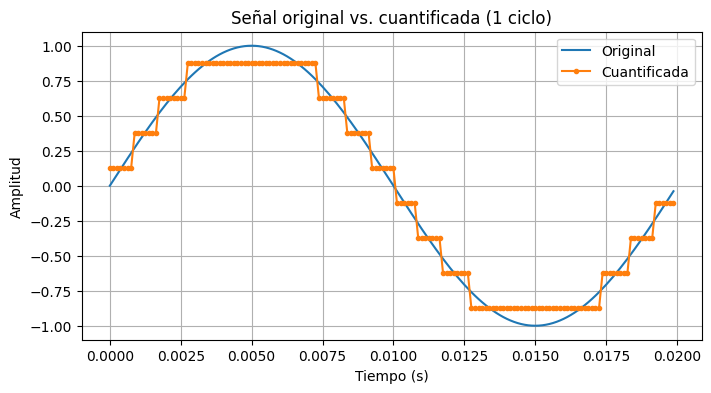

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scalib import UniformSQ, snr, toDB

#? 1. Generación de la señal sinusoidal
fs = 8000            # Frec. de muestreo
f = 50               # Frecuencia de la seno
t = np.arange(0, 1, 1/fs)  # Vector de tiempo, 1 s de duración
x = np.sin(2 * np.pi * f * t)  # Señal sinusoidal

#? 2. Cuantificador uniforme de media contrahuella
b = 3
xRange = (-1, 1)  # Rango de la señal, pues x va de -1 a 1
qtz = UniformSQ(b, xRange, qtype='midrise')  # Cuantificador midrise
xq = qtz.quantize(x)                         # Señal cuantificada

#? 3. Representación de la señal original y cuantificada en 1 ciclo (160 muestras)
nCiclo = 160
plt.figure(figsize=(8,4))
plt.plot(t[:nCiclo], x[:nCiclo], label='Original')
plt.plot(t[:nCiclo], xq[:nCiclo], label='Cuantificada', marker='o', markersize=3)
plt.title('Señal original vs. cuantificada (1 ciclo)')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.legend()
plt.grid(True)
plt.show()


### Preguntas:
 - **¿Cuántos niveles de cuantificación se aprecian?**

   Se aprecian 8 niveles (pues b=3 bits => $2^3=8$ niveles).

 - **¿Hay algún nivel de valor 0?**

   No, en midrise no se incluye el nivel 0 exactamente, por construcción.

 - **¿Es este el resultado esperado?**

   Sí, porque el cuantificador de media contrahuella desplaza los niveles
   de modo que no coincidan con 0.
___

### 2. Cálculo de la potencia del error de cuantificación y comparación teórica

1. Potencia experimental del error

   - Se define el error de cuantificación como $e[n] = x[n] - x_q[n]$.
 
   - La potencia media del error (MSE) es $P_e = E[e^2[n]]$.
        Para mayor comodidad, podemos expresarla en decibelios usando $10 \log_{10}(P_e)$.

2. Potencia teórica del error

   - Para un cuantificador uniforme midrise con paso $q$, la potencia del error (para una señal bien ajustada al rango) suele aproximarse por $q^2 / 12$.

   - Dado $q = 0.25$, $q^2 = 0.0625$. Entonces $\frac{q^2}{12} = \frac{0.0625}{12} \approx 0.0052083$.

   - En decibelios, $10 \log_{10}(0.0052083) \approx -22.83 \text{ dB}$.

In [6]:

#? 4. Cálculo de la potencia del error
error = x - xq

# Calcular la potencia del error experimental
Pe = 0
for e in error:
        Pe += e**2
Pe /= len(error)

Pe_dB = 10 * np.log10(Pe)
q = (xRange[1] - xRange[0]) / 2**b  # = 2 / 8 = 0.25
Pe_teorica = q**2 / 12
Pe_teorica_dB = 10 * np.log10(Pe_teorica)

print(f"Potencia del error experimental (lineal): {Pe:.6f}")
print(f"Potencia del error experimental (dB): {Pe_dB:.2f} dB")
print(f"Potencia teórica del error (lineal): {Pe_teorica:.6f}")
print(f"Potencia teórica del error (dB): {Pe_teorica_dB:.2f} dB")


Potencia del error experimental (lineal): 0.006138
Potencia del error experimental (dB): -22.12 dB
Potencia teórica del error (lineal): 0.005208
Potencia teórica del error (dB): -22.83 dB


La potencia del error de cuantificación uniforme se puede aproximar teóricamente cuando se modela el error como una variable aleatoria uniforme en el intervalo $\left[-\frac{q}{2}, \frac{q}{2}\right]$, donde $q$ es el tamaño del cuanto. Dado que la media de esta distribución es cero, la potencia del error coincide con su varianza:

$$
P_e = \text{Var}(e) = \frac{q^2}{12}
$$

Esta expresión es válida bajo la suposición de que la señal es suficientemente compleja y el error no está correlacionado con ella. Dado que la densidad es constante (distribución uniforme), $f(e) = \frac{1}{q}$, la potencia es:

$$
P_e = \int_{-\frac{q}{2}}^{\frac{q}{2}} e^2 \cdot \frac{1}{q} \, de = \frac{1}{q} \int_{-\frac{q}{2}}^{\frac{q}{2}} e^2 \, de = \frac{1}{q} \left[\frac{e^3}{3}\right]_{-\frac{q}{2}}^{\frac{q}{2}} =\frac{1}{q} \frac{q^3}{12} = \frac{q^2}{12}
$$

Por ejemplo, si $q = 0.25$, entonces:

$$
P_e = \frac{0.25^2}{12} = \frac{0.0625}{12} \approx 0.005208
$$

Y en decibelios:

$$
P_{\text{dB}} = 10 \log_{10}(0.005208) \approx -22.83\ \text{dB}
$$

**La potencia experimental del error puede diferir ligeramente de la teórica debido a:**
 - El uso de un número finito de muestras (solo 1s de duración).
 - La posible ligera desadaptación del rango si la señal no ocupa perfectamente -1 a 1.
___

### 3. Cálculo y representación del espectro
- Para visualizar el espectro de la señal original y la señal cuantificada, podemos usar la Transformada Rápida de Fourier (FFT).

- Observaremos cómo la cuantificación introduce distorsión (armónicos adicionales y ensanchamiento espectral).

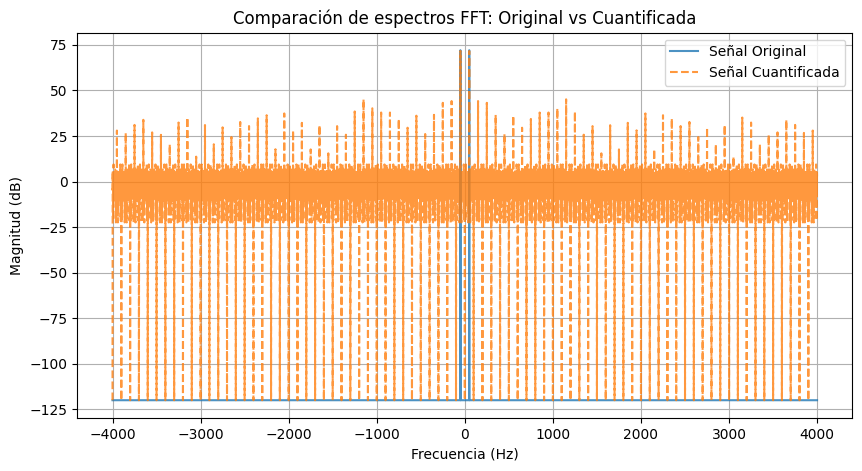

In [7]:

#? Función auxiliar para obtener el espectro en dB y las frecuencias
def spectrum_db(signal, fs):
    """
    Calcula la FFT de 'signal', aplica shift y devuelve:
    - freq: eje de frecuencias centrado en 0
    - mag_db: magnitud del espectro en decibelios
    """
    N = len(signal)
    spectrum = np.fft.fft(signal)
    freq = np.fft.fftfreq(N, d=1/fs)
    # Centrar el espectro en 0
    spectrum = np.fft.fftshift(spectrum)
    freq = np.fft.fftshift(freq)
    # Evitar log(0) añadiendo un epsilon muy pequeño
    mag_db = 10 * np.log10(np.abs(spectrum)**2 + 1e-12)
    return freq, mag_db

#? Caso: señal original x, señal cuantificada xq, ambas de longitud len(x)
# fs = frecuencia de muestreo
# Calculamos y representamos sus espectros juntos
freq_x, X_db = spectrum_db(x, fs)
freq_xq, Xq_db = spectrum_db(xq, fs)

plt.figure(figsize=(10, 5))
plt.plot(freq_x, X_db, label="Señal Original", alpha=0.8)
plt.plot(freq_xq, Xq_db, label="Señal Cuantificada", alpha=0.8, linestyle="--")
plt.title("Comparación de espectros FFT: Original vs Cuantificada")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Magnitud (dB)")
plt.legend()
plt.grid(True)
plt.show()

# Ejercicio 3
Repita el **Ejercicio 2** añadiendo *dither* a la señal sinusoidal antes de cuantificarla.  
Para generar el *dither* puede usar la función `genDither` incluida en *scalib*.  
Pruebe con los 3 tipos de *dither* mencionados anteriormente.  
Para cada uno, calcule su potencia de forma experimental y compárela con la potencia teórica esperada. Tenga en cuenta que al añadir el *dither*, la señal puede tomar valores fuera del rango de entrada del cuantificador $(-1, 1)$.

No olvide comparar también la potencia experimental y teórica del error de cuantificación, y representar el espectro de la señal original y cuantificada, explicando los resultados obtenidos.
___

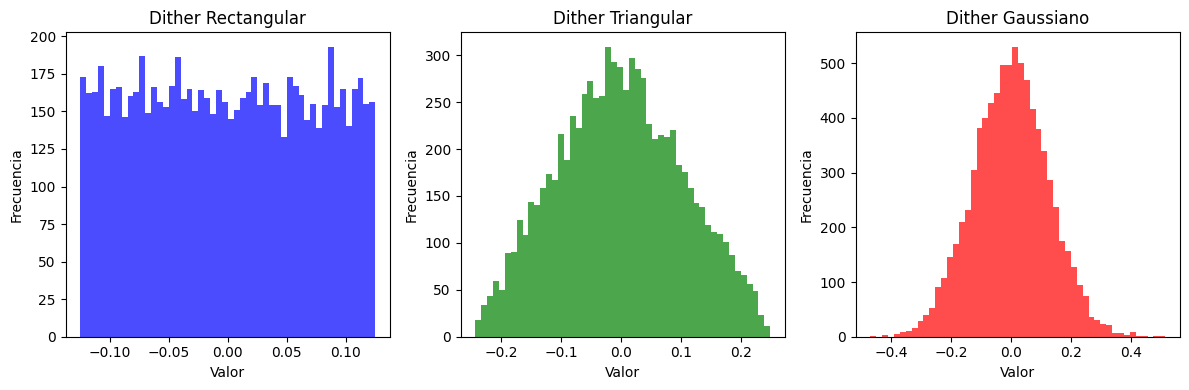

Potencia del dither (solo ruido agregado):
 Rectangular: Teórica = -22.83 dB, Experimental = -22.79 dB
 Triangular:  Teórica = -19.82 dB, Experimental = -19.66 dB
 Gaussiano:   Teórica = -18.06 dB, Experimental = -18.08 dB

Potencia total (cuantificación + dither):
 Rectangular: Teórica = -19.82 dB, Experimental = -20.19 dB
 Triangular:  Teórica = -18.06 dB, Experimental = -18.55 dB
 Gaussiano:   Teórica = -16.81 dB, Experimental = -17.69 dB

Relación señal-ruido (SNR):
 Dither Rectangular: 17.18 dB
 Dither Triangular:  15.54 dB
 Dither Gaussiano:   14.68 dB


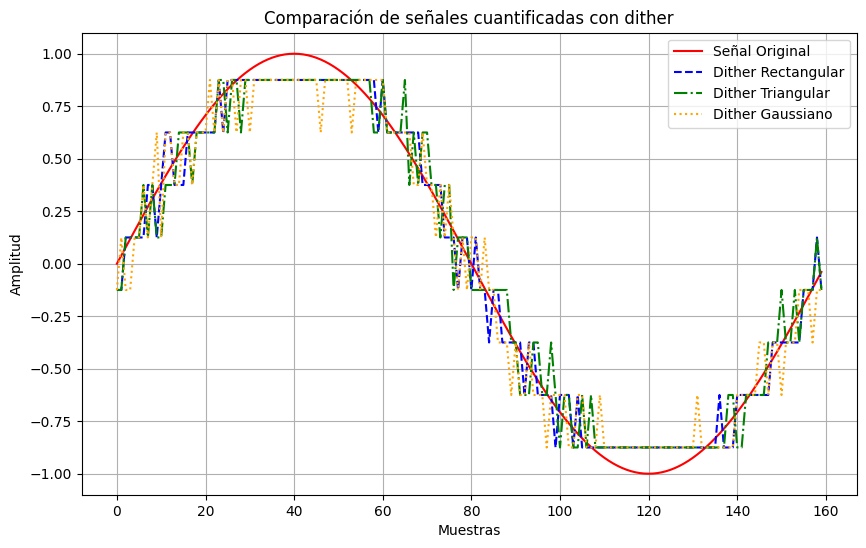

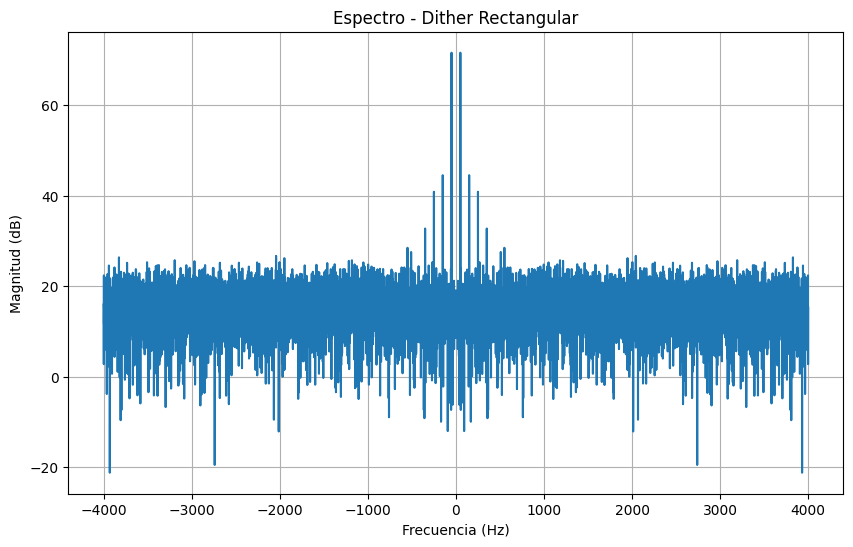

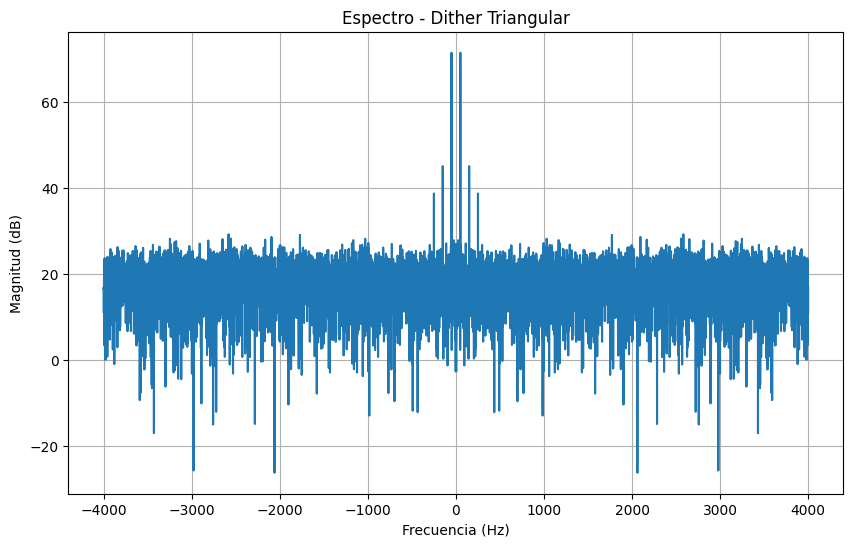

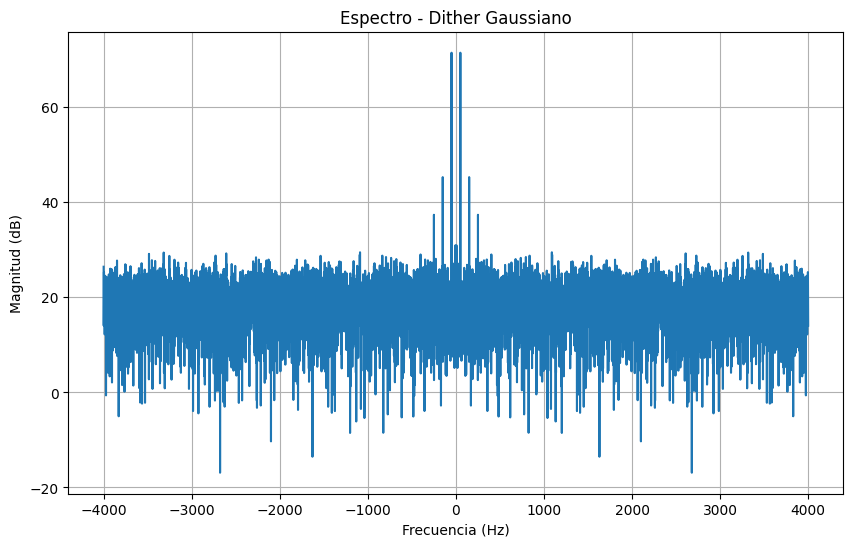

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from scalib import UniformSQ, genDither, snr

#? --- Configuración inicial ---
# Parámetros de la señal
sample_rate = 8000         # Frecuencia de muestreo (Hz)
signal_freq = 50           # Frecuencia de la señal (Hz)
duration = 1.0             # Duración en segundos
time_vec = np.linspace(0, duration, int(sample_rate * duration), endpoint=False)
orig_signal = np.sin(2 * np.pi * signal_freq * time_vec)  # Señal senoidal

# Parámetros del cuantificador
bits = 3
min_val, max_val = -1, 1
step_size = (max_val - min_val) / (2 ** bits)  # Tamaño del cuanto (q)

# Crear cuantificador uniforme de tipo midrise (media contrahuella)
quant = UniformSQ(bits, (min_val, max_val), qtype="midrise")

#? --- Generación de dither ---
# Se generan 3 dither con distribuciones diferentes
dither_rect = genDither(len(orig_signal), step_size, pdf="rectangular")
dither_tri  = genDither(len(orig_signal), step_size, pdf="triangular")
dither_gauss = genDither(len(orig_signal), step_size, pdf="gaussian")

# Visualizar histogramas de los dither
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.hist(dither_rect, bins=50, color="blue", alpha=0.7)
plt.title("Dither Rectangular")
plt.xlabel("Valor")
plt.ylabel("Frecuencia")

plt.subplot(1, 3, 2)
plt.hist(dither_tri, bins=50, color="green", alpha=0.7)
plt.title("Dither Triangular")
plt.xlabel("Valor")
plt.ylabel("Frecuencia")

plt.subplot(1, 3, 3)
plt.hist(dither_gauss, bins=50, color="red", alpha=0.7)
plt.title("Dither Gaussiano")
plt.xlabel("Valor")
plt.ylabel("Frecuencia")

plt.tight_layout()
plt.show()

#? --- Aplicación del dither y cuantificación ---
# Se añade el dither a la señal original
signal_rect = orig_signal + dither_rect
signal_tri  = orig_signal + dither_tri
signal_gauss = orig_signal + dither_gauss

# Cuantificar las señales con dither aplicado
quant_rect = quant.quantize(signal_rect)
quant_tri  = quant.quantize(signal_tri)
quant_gauss = quant.quantize(signal_gauss)

#? --- Cálculos de potencia ---
# Las potencias teóricas del dither se derivan de:
# Rectangular:  q^2 / 12, Triangular:  q^2 / 6, Gaussiano:  q^2 / 4
P_dither_rect_theo = step_size**2 / 12
P_dither_tri_theo  = step_size**2 / 6
P_dither_gauss_theo = step_size**2 / 4

# Potencias experimentales de los dither
P_dither_rect_exp = np.mean(dither_rect**2)
P_dither_tri_exp  = np.mean(dither_tri**2)
P_dither_gauss_exp = np.mean(dither_gauss**2)

# Para el error total (cuantificación + dither), se asume que se suma el ruido de cuantificación 
# (aproximadamente q^2/12) y la potencia del dither.
P_total_rect_theo = step_size**2 / 12 + P_dither_rect_theo
P_total_tri_theo  = step_size**2 / 12 + P_dither_tri_theo
P_total_gauss_theo = step_size**2 / 12 + P_dither_gauss_theo

# Función para pasar a decibelios
def to_dB(power):
    return 10 * np.log10(power)

# Conversión a dB (teórico y experimental)
P_dither_rect_theo_dB = to_dB(P_dither_rect_theo)
P_dither_tri_theo_dB  = to_dB(P_dither_tri_theo)
P_dither_gauss_theo_dB = to_dB(P_dither_gauss_theo)

P_dither_rect_exp_dB = to_dB(P_dither_rect_exp)
P_dither_tri_exp_dB  = to_dB(P_dither_tri_exp)
P_dither_gauss_exp_dB = to_dB(P_dither_gauss_exp)

P_total_rect_theo_dB = to_dB(P_total_rect_theo)
P_total_tri_theo_dB  = to_dB(P_total_tri_theo)
P_total_gauss_theo_dB = to_dB(P_total_gauss_theo)

# Error experimental: diferencia entre señal original y cuantificada
error_rect = orig_signal - quant_rect
error_tri  = orig_signal - quant_tri
error_gauss = orig_signal - quant_gauss

P_error_rect_exp = np.var(error_rect)
P_error_tri_exp  = np.var(error_tri)
P_error_gauss_exp = np.var(error_gauss)

P_error_rect_exp_dB = to_dB(P_error_rect_exp)
P_error_tri_exp_dB  = to_dB(P_error_tri_exp)
P_error_gauss_exp_dB = to_dB(P_error_gauss_exp)

#? --- Mostrar resultados en consola ---
print("Potencia del dither (solo ruido agregado):")
print(f" Rectangular: Teórica = {P_dither_rect_theo_dB:.2f} dB, Experimental = {P_dither_rect_exp_dB:.2f} dB")
print(f" Triangular:  Teórica = {P_dither_tri_theo_dB:.2f} dB, Experimental = {P_dither_tri_exp_dB:.2f} dB")
print(f" Gaussiano:   Teórica = {P_dither_gauss_theo_dB:.2f} dB, Experimental = {P_dither_gauss_exp_dB:.2f} dB\n")

print("Potencia total (cuantificación + dither):")
print(f" Rectangular: Teórica = {P_total_rect_theo_dB:.2f} dB, Experimental = {P_error_rect_exp_dB:.2f} dB")
print(f" Triangular:  Teórica = {P_total_tri_theo_dB:.2f} dB, Experimental = {P_error_tri_exp_dB:.2f} dB")
print(f" Gaussiano:   Teórica = {P_total_gauss_theo_dB:.2f} dB, Experimental = {P_error_gauss_exp_dB:.2f} dB\n")

# Calcular la SNR para cada caso
SNR_rect = snr(orig_signal, quant_rect)
SNR_tri  = snr(orig_signal, quant_tri)
SNR_gauss = snr(orig_signal, quant_gauss)

print("Relación señal-ruido (SNR):")
print(f" Dither Rectangular: {SNR_rect:.2f} dB")
print(f" Dither Triangular:  {SNR_tri:.2f} dB")
print(f" Dither Gaussiano:   {SNR_gauss:.2f} dB")

#? --- Graficar segmentos de las señales ---
plt.figure(figsize=(10, 6))
plt.plot(orig_signal[:160], label="Señal Original", color="red")
plt.plot(quant_rect[:160], label="Dither Rectangular", color="blue", linestyle="--")
plt.plot(quant_tri[:160], label="Dither Triangular", color="green", linestyle="-.")
plt.plot(quant_gauss[:160], label="Dither Gaussiano", color="orange", linestyle=":")
plt.title("Comparación de señales cuantificadas con dither")
plt.xlabel("Muestras")
plt.ylabel("Amplitud")
plt.legend()
plt.grid(True)
plt.show()

#? --- Función para graficar el espectro (FFT) ---
def plot_fft(signal, title, fs):
    """
    Usa la función 'spectrum_db' para calcular el espectro en dB y lo grafica.
    """
    freq, mag_db = spectrum_db(signal, fs)
    plt.figure(figsize=(10, 6))
    plt.plot(freq, mag_db)
    plt.title(title)
    plt.xlabel("Frecuencia (Hz)")
    plt.ylabel("Magnitud (dB)")
    plt.grid(True)
    plt.show()

# Representamos el espectro para cada señal cuantificada con dither
plot_fft(quant_rect, "Espectro - Dither Rectangular", sample_rate)
plot_fft(quant_tri, "Espectro - Dither Triangular", sample_rate)
plot_fft(quant_gauss, "Espectro - Dither Gaussiano", sample_rate)

# Ejercicio 4
Cargue la señal de audio almacenada en el archivo `altura.wav` y cuantifíquela usando un cuantificador uniforme de media contrahuella con una tasa de 3 bits por muestra.  
Repita el proceso de cuantificación añadiendo previamente *dither* triangular a la señal.  

Reproduzca las dos señales cuantificadas (con y sin *dither*) y comente la calidad percibida de la señal en cada caso.  
Compare también las dos señales en términos de **SNR**.

Repita la cuantificación de la señal con y sin *dither* usando un cuantificador de 5 bits por muestra. Compare las dos señales cuantificadas en términos de calidad percibida y **SNR**.
___

In [17]:
import numpy as np
import scipy.io.wavfile as wf
import sounddevice as sd
from scalib import UniformSQ, genDither, snr, signalRange

#? --- Cargar la señal de audio ---
frecuencia_muestreo, senal_audio = wf.read("Datos/altura.wav")
tiempo = np.arange(len(senal_audio)) / frecuencia_muestreo
rango_senal = signalRange(senal_audio)

def cuantificar_con_dither(senal, bits, tipo_dither="triangular"):
    """
    Cuantifica la señal utilizando un cuantificador uniforme (midrise),
    con y sin adición de dither.

    Parámetros:
      senal: Señal de entrada.
      bits: Bits por muestra.
      tipo_dither: Tipo de dither ("rectangular", "triangular", "gaussian").

    Devuelve:
      cuant_sin_dither: Señal cuantificada sin dither.
      cuant_con_dither: Señal cuantificada con dither.
      snr_sin: SNR de la cuantificación sin dither.
      snr_con: SNR con dither.
    """
    cuantificador = UniformSQ(bits, rango_senal, qtype="midrise")
    paso_cuanto = (rango_senal[1] - rango_senal[0]) / (2**bits)

    cuant_sin_dither = cuantificador.quantize(senal)

    ruido_dither = genDither(len(senal), paso_cuanto, pdf=tipo_dither)
    senal_con_ruido = senal + ruido_dither
    cuant_con_dither = cuantificador.quantize(senal_con_ruido)

    snr_sin = snr(senal, cuant_sin_dither)
    snr_con = snr(senal, cuant_con_dither)

    return cuant_sin_dither, cuant_con_dither, snr_sin, snr_con

#? --- Cuantificación con 3 bits ---
bits_3 = 3
cuant_3_sin, cuant_3_con, snr_3_sin, snr_3_con = cuantificar_con_dither(senal_audio, bits_3)

print("Reproduciendo señal cuantificada sin dither (3 bits)...")
sd.play(cuant_3_sin, frecuencia_muestreo)
sd.wait()

print("Reproduciendo señal cuantificada con dither (3 bits)...")
sd.play(cuant_3_con, frecuencia_muestreo)
sd.wait()

print(f"SNR sin dither (3 bits): {snr_3_sin:.2f} dB")
print(f"SNR con dither (3 bits): {snr_3_con:.2f} dB")

#? --- Cuantificación con 5 bits ---
bits_5 = 5
cuant_5_sin, cuant_5_con, snr_5_sin, snr_5_con = cuantificar_con_dither(senal_audio, bits_5)

print("Reproduciendo señal cuantificada sin dither (5 bits)...")
sd.play(cuant_5_sin, frecuencia_muestreo)
sd.wait()

print("Reproduciendo señal cuantificada con dither (5 bits)...")
sd.play(cuant_5_con, frecuencia_muestreo)
sd.wait()

print(f"SNR sin dither (5 bits): {snr_5_sin:.2f} dB")
print(f"SNR con dither (5 bits): {snr_5_con:.2f} dB")


Reproduciendo señal cuantificada sin dither (3 bits)...
Reproduciendo señal cuantificada con dither (3 bits)...
SNR sin dither (3 bits): -1.43 dB
SNR con dither (3 bits): -3.09 dB
Reproduciendo señal cuantificada sin dither (5 bits)...
Reproduciendo señal cuantificada con dither (5 bits)...
SNR sin dither (5 bits): 11.38 dB
SNR con dither (5 bits): 8.96 dB


# Ejercicio 5
Cargue la imagen de Lena (archivo `lena.png`) en escala de grises y cuantifíquela usando un cuantificador uniforme de media contrahuella con una tasa de 3 bits por muestra.  

Repita el proceso de cuantificación añadiendo previamente a la señal *dither* triangular con una amplitud máxima de $q/5$, siendo $q$ el valor del cuanto del cuantificador.  

Calcule la **SNR** en ambos casos. Represente la imagen original y las dos imágenes cuantificadas. Explique el resultado.
___

SNR sin dither: 20.35 dB
SNR con dither: 20.00 dB


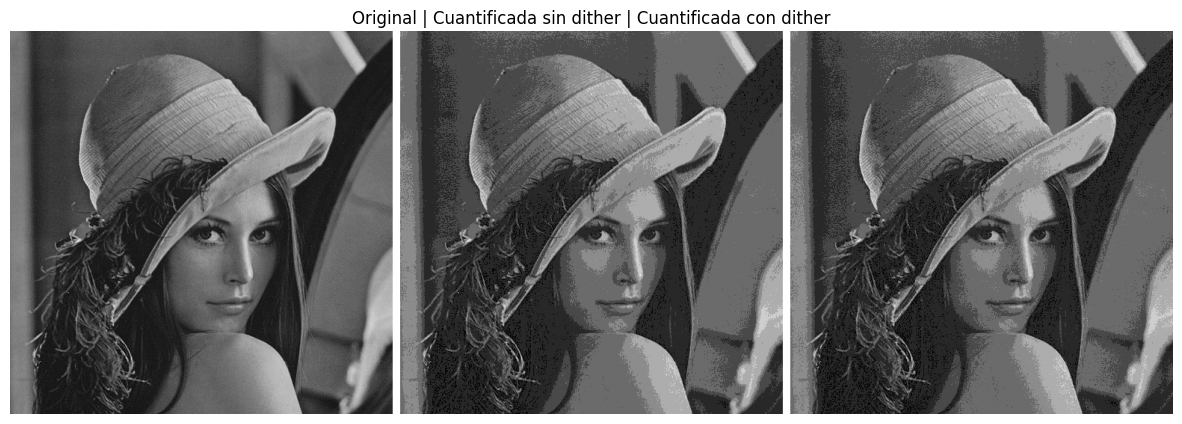

In [ ]:

#? --- Cargar y preparar la imagen ---
# Cargar la imagen de Lena y convertirla a escala de grises
imagen_rgb = io.imread("Datos/lena.png")
imagen_gris = color.rgb2gray(imagen_rgb)

# Obtener el rango dinámico de la imagen en escala de grises
rango_gris = signalRange(imagen_gris)

#? --- Configuración del cuantificador ---
# Se realiza la cuantificación con 3 bits usando un cuantificador de media contrahuella (midrise)
bits = 3
cuantificador = UniformSQ(bits, rango_gris, qtype="midrise")
# Cuantificar la imagen original (sin dither)
imagen_cuantificada = cuantificador.quantize(imagen_gris)

# Calcular el tamaño del cuanto (q)
q_tamano = (rango_gris[1] - rango_gris[0]) / (2**bits)

#? --- Aplicación de dither ---
# Generar dither triangular con amplitud máxima q_tamano/5
ruido_dither = genDither(imagen_gris.shape, q_tamano / 5, pdf="triangular")
# Añadir el dither a la imagen original
imagen_ruidosa = imagen_gris + ruido_dither
# Cuantificar la imagen con dither
imagen_cuantificada_dither = cuantificador.quantize(imagen_ruidosa)

#? --- Cálculo de SNR ---
# Calcular la SNR para la imagen cuantificada sin dither y con dither
snr_sin_dither = snr(imagen_gris, imagen_cuantificada)
snr_con_dither = snr(imagen_gris, imagen_cuantificada_dither)

print(f"SNR sin dither: {snr_sin_dither:.2f} dB")
print(f"SNR con dither: {snr_con_dither:.2f} dB")

#? --- Visualización en un único plot ---
# Para facilitar la comparación, concatenamos las imágenes original, cuantificada sin dither
# y cuantificada con dither en una sola imagen con separadores verticales
separador = np.ones((imagen_gris.shape[0], 10))
imagen_combinada = np.hstack((imagen_gris, separador, imagen_cuantificada, separador, imagen_cuantificada_dither))

plt.figure(figsize=(15, 5))
plt.imshow(imagen_combinada, cmap="gray")
plt.axis("off")
plt.title("Original | Cuantificada sin dither | Cuantificada con dither")
plt.show()


# Ejercicio 6

Cargue la imagen de Lena (archivo `lena.png`) en color y cuantifíquela usando un cuantificador uniforme de media contrahuella y 3 bits por muestra. A continuación, implemente la técnica de *dithering* de **Floyd-Steinberg** y repita el proceso de cuantificación de la imagen de Lena usando esta técnica.

Calcule la **SNR** de las dos imágenes cuantificadas. Represente en una misma figura la imagen original, la imagen cuantificada con el cuantificador uniforme y la imagen cuantificada usando *dithering* de Floyd-Steinberg. Compare las dos imágenes cuantificadas en términos de calidad percibida y **SNR**.
___

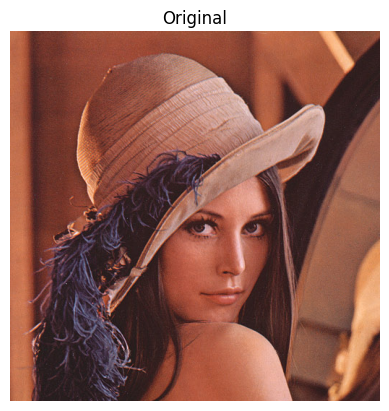

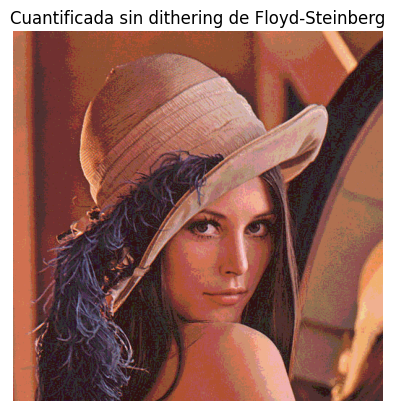

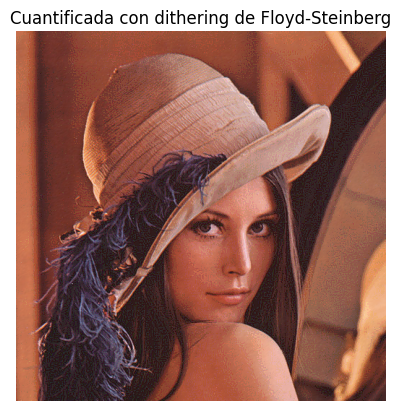

SNR (sin dithering): 21.16 dB
SNR (Floyd-Steinberg): 21.62 dB


In [20]:
# ---------------------------------------------------------
# Algoritmo de Floyd-Steinberg para imagen en color
# ---------------------------------------------------------

#? Definir parámetros de cuantificación
imagen = io.imread("Datos/lena.png")


rango_imagen = signalRange(imagen)
bits = 3
cuantificador = UniformSQ(bits, rango_imagen, qtype="midrise")

#? Crear arrays para almacenar la imagen cuantificada (sin dithering) y la imagen resultante del algoritmo de Floyd-Steinberg
imagen_cuant = np.zeros_like(imagen)
imagen_floyd = np.zeros_like(imagen)

#? Recorrer la imagen y aplicar Floyd-Steinberg en cada píxel (y cada canal)
for fila in range(imagen.shape[0]):
    for col in range(imagen.shape[1]):
        for canal in range(imagen.shape[2]):  # Para cada canal (R, G, B)
            # Cuantificar el píxel actual
            pixel_cuant = cuantificador.quantize(imagen[fila, col, canal])
            imagen_cuant[fila, col, canal] = pixel_cuant

            # Calcular el error entre el valor original y el cuantificado
            error_pixel = float(imagen[fila, col, canal]) - float(pixel_cuant)

            # Añadir la componente cuantificada al array Floyd-Steinberg
            # (Este array se irá modificando al propagar el error)
            imagen_floyd[fila, col, canal] += pixel_cuant

            # Distribuir el error entre los píxeles vecinos
            # (sólo si están dentro de los límites de la imagen)
            if col + 1 < imagen.shape[1]:
                imagen_floyd[fila, col + 1, canal] += error_pixel * (7 / 16)

            if fila + 1 < imagen.shape[0] and col - 1 >= 0:
                imagen_floyd[fila + 1, col - 1, canal] += error_pixel * (3 / 16)

            if fila + 1 < imagen.shape[0]:
                imagen_floyd[fila + 1, col, canal] += error_pixel * (5 / 16)

            if fila + 1 < imagen.shape[0] and col + 1 < imagen.shape[1]:
                imagen_floyd[fila + 1, col + 1, canal] += error_pixel * (1 / 16)

#? Mostrar las tres versiones de la imagen
plt.figure()
plt.imshow(imagen)
plt.title("Original")
plt.axis("off")
plt.show()

plt.figure()
plt.imshow(imagen_cuant)
plt.title("Cuantificada sin dithering de Floyd-Steinberg")
plt.axis("off")
plt.show()

plt.figure()
plt.imshow(imagen_floyd)
plt.title("Cuantificada con dithering de Floyd-Steinberg")
plt.axis("off")
plt.show()

#? Calcular la SNR de ambas imágenes cuantificadas
snr_sin_dither = snr(imagen, imagen_cuant)
snr_floyd = snr(imagen, imagen_floyd)

print(f"SNR (sin dithering): {snr_sin_dither:.2f} dB")
print(f"SNR (Floyd-Steinberg): {snr_floyd:.2f} dB")
